# Second Hands-On Session
--- 
- Explore properties of an ensamble of particles
- Tracking of an ensample of particles and its properties along a beamline
---

##### First, Let's import standard packages and settings...

In [1]:
# Import custom tracking functions and useful libraries
from tracking_library import *

# Set up plotting
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (15, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

### Exercise 8 (guided)

Define an ensemble of 1000 particles with arbitrary first order (e.g. $<x_0> = 0.2$ mm, $<x'_0> = 1$ mrad) and second order (e.g. $\sigma_{x_0} = 1.5$ mm and $\sigma_{x'_0} = 0.5$ mrad) momenta.
Verify that the angular divergence of the beam is the one set: 

- What do you observe?
- What happens if you increase or decrease the number of particles?

**Python Hint 1:** Remember that you can create a Normal distributed 2xN 2D array of numbers as `np.random.randn(2, N)`. One can then "stretch" and "offset" (and eventually "rotate", but this is not requested here) this distribution to obtain any desired 2D normal distribution in phase space. Mind that **2** indicates the two coordinates $(x\, x')$, and **N** the number of particles.

**Python Hint 2:** the **mean** and **standard deviation** along **each row** of a NxM array can easily be computed with `np.mean(N_times_M_array,1)` and `np.std(N_times_M_array,1)`, respectively. 

#### SOLUTION

In [3]:
# simple solution
N_particles = 1000
beam = np.array([np.random.randn(N_particles), np.random.randn(N_particles)])
# or equivalently:
beam = np.random.randn(2, N_particles)
x0 = 0.2
xp0 = 1
sigx = 1.5
sigxp = 0.5
# add a scaling (sigx*) and an offset (+x0) to the x (0) coordinate:
beam[0, :] = sigx * beam[0, :] + x0
# add a scaling (sigxp*) and an offset (+xp0) to the x' (1) coordinate:
beam[1, :] = sigxp * beam[1, :] + xp0

# compute the means and std of the particle coordinates
means = np.mean(beam, 1)
stds  = np.std(beam, 1)

# print the actual means and stds over all particle coordinates
print(f"Beam mean  x [mm]: {means[0]}")
print(f"Beam mean  x' [mrad]: {means[1]}")
print(f"Beam rms size [mm]: {stds[0]}")
print(f"Beam rms divergence [mrad]: {stds[1]}")

Beam mean  x [mm]: 0.16978932094641347
Beam mean  x' [mrad]: 0.9906759413638031
Beam rms size [mm]: 1.4933510022960075
Beam rms divergence [mrad]: 0.4984525380895884


> **NOTE:** We did not find back the rms values and offsets that we initially set (e.g. 0.5 for $\sigma_{x'_0}$) due to the statistical error coming with the finite numbers of particles. We can explore the dependence of the statistical error with on the beam divergence by a numerical simulation.

### Exercise 9

1. Transport the beam distribution of [Exercise 8](#exercise-8-guided) along a drift of length 1 m. Visualise the initial and final beam distribution in phase space, as well as the initial and final **mean** position and angle. **What do you observe?**

   **Python Hint 1:** the output of `transportParticles` contains the coordinates of all particles at all locations. To obtain all particle coordinates at the end of the beamline, you can simply do:

   ```
   tracked = transportParticles(initial_coordinates, beamline)
   final_coordinates = tracked['coords'][-1] #where "-1" refers to the last element of the beamline
   ```

   **Python Hint 2:** One can use the `seaborn` package to nicely see a 2D distribution, e.g.:
   ```
   import seaborn as sns
   sns.jointplot(x=np.random.randn(1000), y=np.random.randn(1000), kind="hex", color="b")
   ```


#### SOLUTION

/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

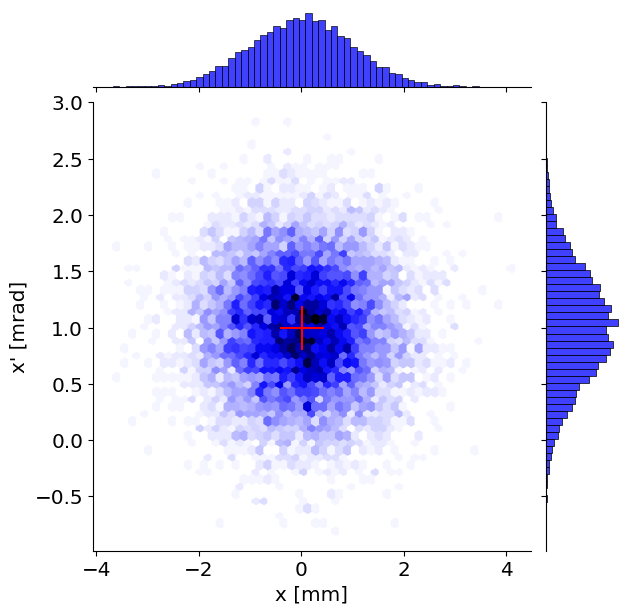

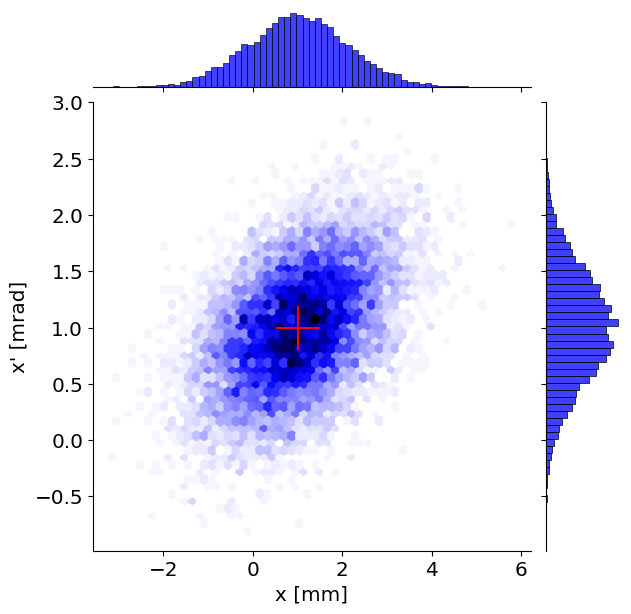

In [5]:
# code here your solution...
n_part = 10000
beam = np.random.randn(2, n_part)
x0 = 0
xp0 = 1
sigx = 1
sigxp = 0.5
beam[0, :] = sigx * beam[0, :] + x0
beam[1, :] = sigxp * beam[1, :] + xp0

# transport the particles
tracked = transportParticles(beam, D(1))
beam_after_drift = tracked["coords"][-1]  # where "-1" refers to the last element of the beamline

# compute the means and std of the particle coordinates
means_init = np.mean(beam, 1)
means_after_drift = np.mean(beam_after_drift, 1)


# Before the drift
g = sns.jointplot(x=beam[0, :], y=beam[1, :], kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")
plt.scatter(means_init[0], means_init[1], 1000, marker='+', color='r')

# After the drift
g = sns.jointplot(x=beam_after_drift[0, :], y=beam_after_drift[1, :], kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")
plt.scatter(means_after_drift[0], means_after_drift[1], 1000, marker='+', color='r')


> **Note that the distribution in phase space is now a "tilted" ellipse!** But also the **mean position has moved from 0 to 1: why?**

### Exercise 10

Build a beamline made of several drift and quadrupoles as desired (e.g. `D(0.5)+Q(1)+D(2)+Q(-1)+D(1)+Q(2)+....`).
Build a beam made of several particles (e.g. 100) again with arbitrary first order (e.g. $<x_0> = 0.2$ mm, $<x'_0> = 1$ mrad) and second order (e.g. $\sigma_{x_0} = 1.5$ mm and $\sigma_{x'_0} = 0.5$ mrad) momenta, as done in previous [Exercise 9](#exercise-9).

1. Compute and plot the beam **mean trajectory** ($<x>$) and **size** ($\sigma_x$) along the beam line.

**Python Hint 1:** Remember that in the output of our `transportParticles` function the key `'x'` contains a 2D array with N rows (the index of the position along the beam line) and M columns (the index of a given particle). 
You can then then compute again the mean and standard deviation of **each row**, i.e. at each position along the beamline, of a NxM array as `np.mean(N_times_M_array,1)` and `np.std(N_times_M_array,1)`, respectively. 


#### SOLUTION

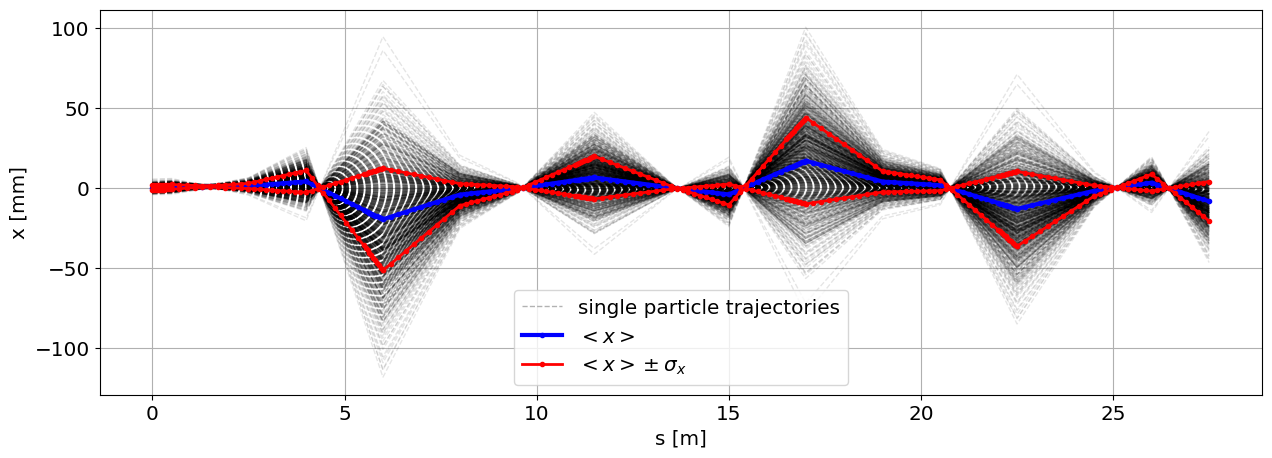

In [10]:
# code here your solution...
# prepare the beamline
beamline = 5 * (10 * D(0.5 / 10) + Q(1) + 10 * D(2 / 10) + Q(-0.8) + 10 * D(1.5 / 10) + Q(0.3) + +10 * D(1.5 / 10))

# prepare the beam
N_particles = 1000
beam = np.random.randn(2, N_particles)
x0 = 0.2
xp0 = 1
sigx = 1.5
sigxp = 0.5
beam[0, :] = sigx * beam[0, :] + x0
beam[1, :] = sigxp * beam[1, :] + xp0

# Transport the particles
transported_particles = transportParticles(beam, beamline)

# Compute means and stds
mean_trajectory = np.mean(transported_particles["x"], 1)
beam_size_evollution = np.std(transported_particles["x"], 1)

# lets look at all particles and its standard deviation
plt.plot(transported_particles["s"], transported_particles["x"], "--k", lw=1, alpha=0.1)
plt.plot([],[], "--k", lw=1, alpha=0.3, label='single particle trajectories') # dummy plot, for label
plt.plot(transported_particles["s"], mean_trajectory, ".-b", lw=3, label=r'$<x>$')
plt.plot(transported_particles["s"], mean_trajectory + beam_size_evollution, ".-r", lw=2, label=r'$<x> \pm \sigma_x$')
plt.plot(transported_particles["s"], mean_trajectory - beam_size_evollution, ".-r", lw=2)

plt.grid(True)
plt.ylabel("x [mm]")
plt.xlabel("s [m]")
plt.legend()

### Interlude: track of mean trajectory
---

One can easily demonstrate (see [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/)) that the same matrix ($M$) used for tracking the coordinates ($(x_i, x'_i)$) of each single particle ($i$) from an initial point ($X_0$) to a final point ($X_s$) in a beamline:

\begin{equation}
X_s =  M\, X_0
\end{equation}

can also be used to track the **average trajectory** ($\langle X \rangle$) of the given particle coordinates distribution:

\begin{equation}
\langle X_s \rangle = 
\left[
\begin{array}{c}
\langle x_i \rangle\\
\langle x'_i \rangle
\end{array}
\right]_s 
= M\, \langle X_0 \rangle
\end{equation}

### Exercise 11

Show that the average position of a beam made of 100 particles along a beam line (e.g. the beamline you previously defined) is the same as the trajectory of single particle particle that starts in the center of the initial particle distribution.

**Python hint:** the "mean" particle of a 2xN particle distribution distribution stored, for example, in the variable `beam` can be quickly computed as `np.mean(beam,1).reshape((2,1))`. The `reshape()` function is necessary to ensure the output of `mean()` to be again a 2xN (where N=1 in this case) column array.

**Note:** please, start with a Gaussian-distributed beam with non-zero mean offset and angle (e.g. $<x_0> = 1.1$ mm, $<x'_0> = 1$ mrad) and possibly also non-one standard deviations (e.g. $\sigma_{x_0} = 1.$ mm and $\sigma_{x'_0} = 0.2$ mrad), as done in previous exercises.

#### SOLUTIONS

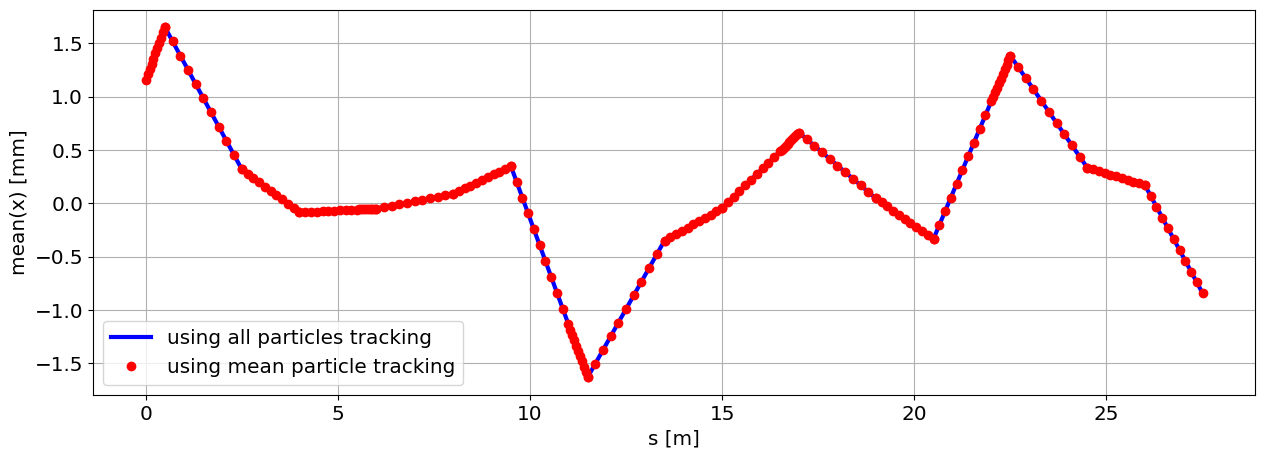

In [21]:
# code here your solution...
# lattice
beamline = 5 * (10 * D(0.5 / 10) + Q(1) + 10 * D(2 / 10) + Q(-0.8) + 10 * D(1.5 / 10) + Q(0.3) + +10 * D(1.5 / 10))

# prepare the beam
n_part = 100
beam0 = np.random.randn(2, n_part)
x0 = 1.1
xp0 = 1
sigx = 1
sigxp = 0.2
beam0[0, :] = sigx * beam0[0, :] + x0
beam0[1, :] = sigxp * beam0[1, :] + xp0

# transport all particles
transported_particles = transportParticles(beam0, beamline)
# transport only the average position
mean_particle = np.mean(beam0, 1).reshape((2,1))
transported_mean = transportParticles(mean_particle, beamline)

plt.plot(transported_particles["s"], np.mean(transported_particles["x"], 1), "-b", lw=3, label="using all particles tracking")
plt.plot(transported_mean["s"], transported_mean["x"], "or", lw=3, label="using mean particle tracking")
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("mean(x) [mm]")
plt.legend()

### Interlude: track of sigma matrices
---

One can easily demonstrate (see [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/)) that the same matrix ($M$) can also be used to track the **covariance or sigma matrix** of the given particle coordinates distribution:

\begin{equation}
\langle X_s \rangle = 
\left[
\begin{array}{c}
\langle x_i \rangle\\
\langle x'_i \rangle
\end{array}
\right]_s 
= M\, \langle X_0 \rangle
\end{equation}

\begin{equation}
\Sigma_s = \left[
\begin{array}{c}
\sigma_{xx}\quad \sigma_{xx'}\\
\sigma_{x'x}\quad \sigma_{x'x'}
\end{array}
\right]_s
= M\, \Sigma_0\, M^T\, .
\end{equation}

We can therefore "track" the **covariance** of a beam simply starting from its initial covariance matrix in phase space !
This "tracking" of an initial **covariance** matrix along a given beamline is provided by the function `transportSigmas()` from our toolbox:

In [22]:
from tracking_library import transportSigmas

# let's see if there is some help information:
help(transportSigmas)

Help on function transportSigmas in module tracking_library:

transportSigmas(sigma_0, beamline)
    Transport the input sigma matrix (\sigma_{0}) along the given beamline
    
    It will return a dictionary containing the following key:values
        'sigma11': a N-long numpy array with the \sigma_{11} value for all N-elements of the beamline
        'sigma12': a N-long numpy array with the \sigma_{12} value for all N-elements of the beamline
        'sigma21': a N-long numpy array with the \sigma_{21} value for all N-elements of the beamline
        'sigma22': a N-long numpy array with the \sigma_{22} value for all N-elements of the beamline
        's': a N-long numpy array with the longitudinal position of the N-elements of the beamline
        'sigmas': a Nx2x2 numpy array with all sigma matrices at all N-elements of the beamline
    
    Disclaimer: if beamline is made of 5 elements, the output will have 5+1 "elements" as it will also 
                include the initial sigma m

---

### Let's put this in practice

---

### Excercise 12

For the same system as before, compare the rms beam size computed from tracking all particles and from using the sigma matrix approach.

**Note:** Is this valid for any number of initially tracked particles? How does the result change if one uses the **input** covariance matrix used to generate the particle distribution rather then the **actual** covariance matrix of the generated distribution?

**Hint 1:** Remember that the element $\sigma_{xx}$ of the covariance matrix is linked to the rms beam size ($\sigma_x$) as $\sigma_x = \sqrt{\sigma_{xx}}$.

**Hint 2:** The covariance matrix of a 2xN array can be computed using `numpy` as `np.cov(2_times_N_array, bias=True)`.

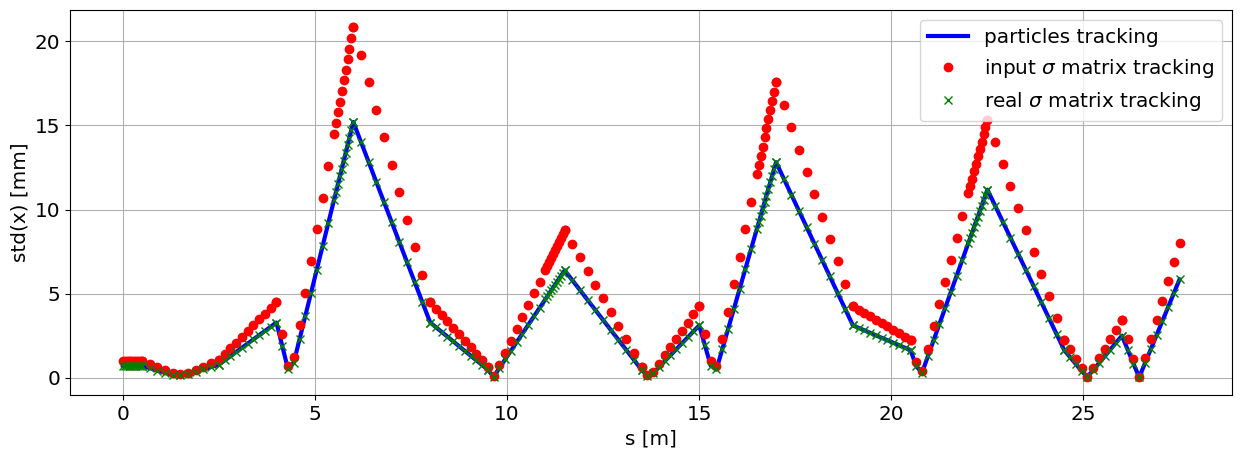

In [11]:
# code here your solution...
# lattice
beamline = 5 * (10 * D(0.5 / 10) + Q(1) + 10 * D(2 / 10) + Q(-0.8) + 10 * D(1.5 / 10) + Q(0.3) + +10 * D(1.5 / 10))

# prepare the beam
n_part = 10
beam0 = np.random.randn(2, n_part)
x0 = 0
xp0 = 1
sigx = 1
sigxp = 0.2
beam0[0, :] = sigx * beam0[0, :] + x0
beam0[1, :] = sigxp * beam0[1, :] + xp0

# prepare the sigma matrix based on our inputs:
sigma_0 = np.array([[sigx**2, 0], [0, sigxp**2]])
# alternative: if we use the covariance matrix of the generated distribution:
sigma_real = np.cov(beam0, bias=True)

# transport all particles:
transported_particles = transportParticles(beam0, beamline)
# transport the sigma matrix only:
transported_sigmas = transportSigmas(sigma_0, beamline)
transported_real_sigmas = transportSigmas(sigma_real, beamline)

# plot all estimation of beam size:
plt.plot(transported_particles["s"], np.std(transported_particles["x"], 1), "-b", lw=3, label=r"particles tracking")
plt.plot(transported_sigmas["s"], np.sqrt(transported_sigmas["sigma11"]), "or", lw=3, label=r"input $\sigma$ matrix tracking")
plt.plot(transported_real_sigmas["s"], np.sqrt(transported_real_sigmas["sigma11"]), "xg", lw=3, label=r"real $\sigma$ matrix tracking")
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("std(x) [mm]")
plt.legend()

> It is important to observe that the result of from the particle tracking and the sigma matrix tracking are equivalent.
The small deviation is due to the statistical noise of the ensemble (it can be reduced by increasing the number of particles).
This deviation is zero (or numerical) if one tracks the actual covariance matrix of the ensemble of the generated particles. (Note that the `bias=True` option to numpy `cov` function is necessary to force the simple (bias) computation of the covariance)
> 
> Clearly, the sigma matrix tracking is computationally cheaper than the particle tracking (if n_part>>1).

---
## Introduction of Twiss values and emittance
---

The sigma/covariance matrix of any particle distribution can also be written as:

\begin{equation}
\Sigma = 
    \left[
    \begin{array}{cc}
    \sigma_{xx}  & \sigma_{xx'}\\
    \sigma_{x'x} & \sigma_{x'x'}
    \end{array}
    \right] =
    \epsilon
    \left[ 
    \begin{array}{cc}
        \beta   & -\alpha\\
        -\alpha & \gamma
    \end{array}
    \right] 
\end{equation}

where $\beta$, $\alpha$, $\gamma$ and $\epsilon$ are parameters such that $\epsilon = \sqrt{\det(\Sigma)}$ and $\beta \gamma - \alpha^2 = 1$. 

**This seems to be an arbitrary choice!** but it will acquire more special meaning later.

In the meantime, recall once more that:

\begin{equation}
\Sigma_{s} = M\, \Sigma_{0}\, M^T\, .
\end{equation}

where $M$ is a real **symplectic** transformation, and its determinant is $\det(M) = +1$, therefore:

\begin{equation}
\epsilon_s = \det(\Sigma_s) = \det( M\, \Sigma_0\, M^T ) = \det(M) \det(\Sigma_0) \det(M^T) = \det(\Sigma_0) = \epsilon_0
\end{equation}

**Two important considerations:** 
- the quantity $\epsilon$ (the beam **statistical emittance**) is **preserved** along a beamline!!!
- the *Twiss* parmeters $\beta, \gamma, \alpha$ define the **normalised** shape/orientation of the beam distribution in phase-space!

### Exercise 13
Verify that the equivalent transport matrix of any beamline, e.g. the one you used previously, has determinant equal to 1 (within machine precision).

**Hint:** you can use `np.linalg.det(matrix)` to compute the determinant of a matrix `matrix`

#### SOLUTION

In [12]:
# code here your solution...
# lattice
beamline = 5 * (10 * D(0.5 / 10) + Q(1) + 10 * D(2 / 10) + Q(-0.8) + 10 * D(1.5 / 10) + Q(0.3) + +10 * D(1.5 / 10))

# compute equivalent matrix of the whole beamline
OTM = getEquivalentElement(beamline)
print(f'The determinant of the FODO OTM is {np.linalg.det(OTM[0]["matrix"])}.')

The determinant of the FODO OTM is 0.9999999999999902.


### Exercise 14

Consider again a beamline, e.g. the one you used previously, and create a valid sigma matrix with:
- $\beta$ = 3 [m]
- $\gamma$ = 0.5 [1/m]
- $\epsilon$ = 5 [$\mu$ m]

Then, propagate the $\sigma$ matrix through the beam line and verify that the emittance $\epsilon$ of the sigma matrix after every element is indeed constant and equal to its initial value.

**Optional:** compute and plot the **beta** (function) all along the beamline, i.e. $\sigma_{11}/\epsilon$

**Hint:** in the output of our `transportSigmas()` function we keep all sigma matrixes. The determinant of all matrices can be computed in one go as `np.linalg.det(transported_sigmas['sigmas'])`.

#### SOLUTION

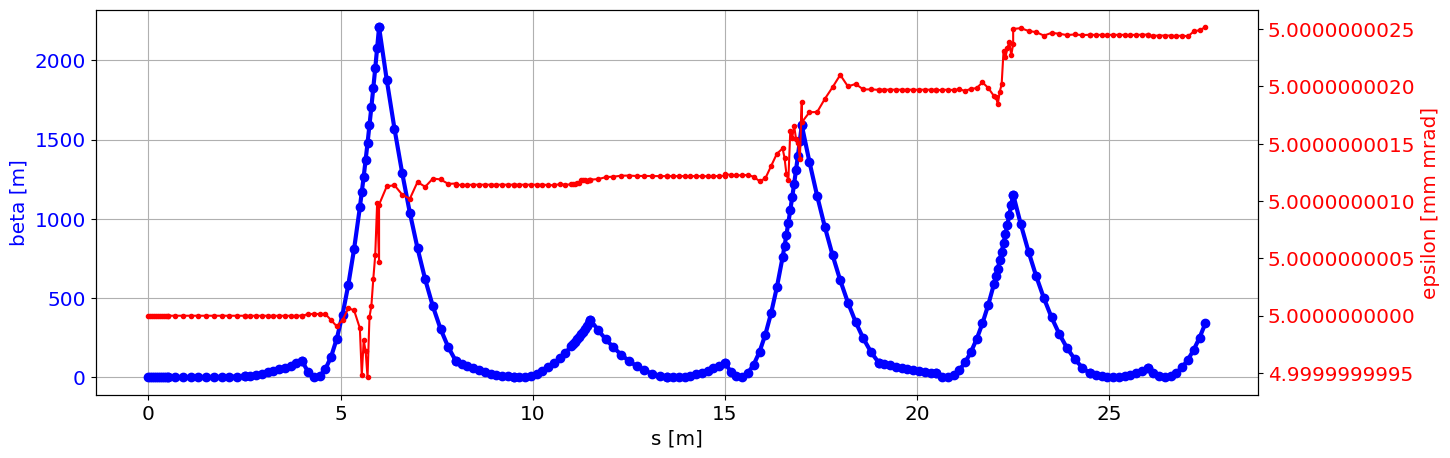

In [13]:
# code here your solution...
# lattice
beamline = 5 * (10 * D(0.5 / 10) + Q(1) + 10 * D(2 / 10) + Q(-0.8) + 10 * D(1.5 / 10) + Q(0.3) + 10 * D(1.5 / 10))

# let's create a simple sigma matrix
beta0 = 3
gamma0 = 0.5
epsilon0 = 5
# alfa must be:
alfa0 = np.sqrt(beta0 * gamma0 - 1)
sigma_0 = epsilon0 * np.array([[beta0, -alfa0], [-alfa0, gamma0]])

# transport the sigma matrix:
transported_sigmas = transportSigmas(sigma_0, beamline)

# compute the emittance as sqrt of the determinant of all sigma matrices along
# the beamline
emittance = np.sqrt(np.linalg.det(transported_sigmas["sigmas"]))
# the beta function can be extracted as well from the 'sigma11' element,
# divided by the emittance
beta = transported_sigmas["sigma11"] / emittance

# make a simple plot
plt.plot(transported_sigmas["s"], beta, "o-b", lw=3)
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("beta [m]", color="b")
plt.tick_params(axis="y", labelcolor="b")

ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
plt.ylabel("epsilon [mm mrad]", color="r")
plt.tick_params(axis="y", labelcolor="r")
plt.plot(transported_sigmas["s"], emittance, ".-r")
plt.ticklabel_format(useOffset=False)

## Well done !!

- Now you understand how to transport an ensamble of particles or its **covariance** matrix along a beamline... But how to design a "nice" beamline?

=> **Continue your learning with the following [notebook](./03_Periodic_Systems.ipynb)**...
